In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

Data Loading

In [3]:
prem_data = pd.read_excel('premiums_young_with_gr.xlsx')
prem_data.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [4]:
prem_data['Genetical_Risk'].value_counts()

Genetical_Risk
3    3399
0    3377
4    3370
5    3352
1    3315
2    3283
Name: count, dtype: int64

In [66]:
prem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20096 entries, 0 to 20095
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    20096 non-null  int64 
 1   Gender                 20096 non-null  object
 2   Region                 20096 non-null  object
 3   Marital_status         20096 non-null  object
 4   Number Of Dependants   20096 non-null  int64 
 5   BMI_Category           20096 non-null  object
 6   Smoking_Status         20094 non-null  object
 7   Employment_Status      20095 non-null  object
 8   Income_Level           20092 non-null  object
 9   Income_Lakhs           20096 non-null  int64 
 10  Medical History        20096 non-null  object
 11  Insurance_Plan         20096 non-null  object
 12  Annual_Premium_Amount  20096 non-null  int64 
 13  Genetical_Risk         20096 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 2.1+ MB


In [67]:
prem_data.dtypes

Age                       int64
Gender                   object
Region                   object
Marital_status           object
Number Of Dependants      int64
BMI_Category             object
Smoking_Status           object
Employment_Status        object
Income_Level             object
Income_Lakhs              int64
Medical History          object
Insurance_Plan           object
Annual_Premium_Amount     int64
Genetical_Risk            int64
dtype: object

DATA CLEANING:

1. REMOVE TRIMSPACE/ HANDLE DATA TYPES
2. REMOVE DUPLICATES
3. HANDLE MISSING VALUES
4. HANDLE OUTLIERS

In [68]:
#convert the column names into snake case
prem_data.columns = prem_data.columns.str.replace(" ","_").str.lower()

In [69]:
all_features= prem_data.columns
all_features

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

## REMOVE TRIMSPACE/ HANDLE DATA TYPES

In [70]:
prem_data= prem_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/var/folders/0n/xvnlc6tj4b912wtm7gxtwn680000gn/T/ipykernel_15420/2006640918.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  prem_data= prem_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [71]:
prem_data.dtypes

age                       int64
gender                   object
region                   object
marital_status           object
number_of_dependants      int64
bmi_category             object
smoking_status           object
employment_status        object
income_level             object
income_lakhs              int64
medical_history          object
insurance_plan           object
annual_premium_amount     int64
genetical_risk            int64
dtype: object

In [72]:
prem_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20096 entries, 0 to 20095
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    20096 non-null  int64 
 1   gender                 20096 non-null  object
 2   region                 20096 non-null  object
 3   marital_status         20096 non-null  object
 4   number_of_dependants   20096 non-null  int64 
 5   bmi_category           20096 non-null  object
 6   smoking_status         20094 non-null  object
 7   employment_status      20095 non-null  object
 8   income_level           20092 non-null  object
 9   income_lakhs           20096 non-null  int64 
 10  medical_history        20096 non-null  object
 11  insurance_plan         20096 non-null  object
 12  annual_premium_amount  20096 non-null  int64 
 13  genetical_risk         20096 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 10.6 MB


In [73]:
#change the premium amount into float
prem_data['annual_premium_amount']= prem_data['annual_premium_amount'].astype('float64')

## 2. REMOVE DUPLICATES

In [74]:
prem_data[prem_data.duplicated()]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk


No duplicates to drop

## 3. HANDLE MISSING VALUES

In [75]:
prem_data.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

There are so many ways to impute the missing values.

1. Mean Imputation
2. Median Imputation
3. Frequency count Imputation
4. Mode Imputation
5. Random Imputation
6. Target Based Imputation

Let us try to use different imputations for three of them

In [76]:
#let us deep dive into each
prem_data['smoking_status'].value_counts()

smoking_status
No Smoking        13855
Regular            4491
Occasional         1738
Smoking=0             5
Does Not Smoke        3
Not Smoking           2
Name: count, dtype: int64

In [77]:
prem_data['smoking_status'].replace({"Smoking=0": "No Smoking",
    "Not Smoking":"No Smoking",
    "Does Not Smoke":"No Smoking"},inplace=True)

/var/folders/0n/xvnlc6tj4b912wtm7gxtwn680000gn/T/ipykernel_15420/2672277990.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prem_data['smoking_status'].replace({"Smoking=0": "No Smoking",


In [78]:
prem_data['smoking_status'].value_counts()

smoking_status
No Smoking    13865
Regular        4491
Occasional     1738
Name: count, dtype: int64

In [79]:
prem_data.groupby('bmi_category')['smoking_status'].value_counts(normalize=True)

bmi_category  smoking_status
Normal        No Smoking        0.687839
              Regular           0.226752
              Occasional        0.085409
Obesity       No Smoking        0.685983
              Regular           0.210650
              Occasional        0.103367
Overweight    No Smoking        0.665330
              Regular           0.240977
              Occasional        0.093693
Underweight   No Smoking        0.711921
              Regular           0.208007
              Occasional        0.080072
Name: proportion, dtype: float64

every bmi_category has more number of no smoking people , so there is no quite relationship so let us impute randomly

In [80]:
prem_data.notna().sum()

age                      20096
gender                   20096
region                   20096
marital_status           20096
number_of_dependants     20096
bmi_category             20096
smoking_status           20094
employment_status        20095
income_level             20092
income_lakhs             20096
medical_history          20096
insurance_plan           20096
annual_premium_amount    20096
genetical_risk           20096
dtype: int64

In [81]:
def random_imputation( dataset, column):
    df= dataset
    col= column
    missing_values_indices= df[df[col].isna()].index  
    sample_values= df[df[col].notna()].sample(df[col].isna().sum(), replace= True, random_state= 30)
    sample_values.index= missing_values_indices
    df.loc[missing_values_indices,col]= sample_values
    return df[col]
    

In [82]:
prem_data['smoking_status']= random_imputation(prem_data,'smoking_status')

In [83]:
prem_data['smoking_status'].isna().sum()

0

In [84]:
prem_data['income_level'].value_counts()

income_level
<10L         7722
10L - 25L    5663
25L - 40L    4199
> 40L        2508
Name: count, dtype: int64

In [85]:
#let us see whether income level depend on employment_status
prem_data.groupby('employment_status')['income_level'].value_counts(normalize= True, ascending=False)

employment_status  income_level
Freelancer         <10L            0.378222
                   10L - 25L       0.256694
                   25L - 40L       0.243555
                   > 40L           0.121529
Salaried           <10L            0.441632
                   10L - 25L       0.316792
                   25L - 40L       0.125409
                   > 40L           0.116167
Self-Employed      25L - 40L       0.288845
                   10L - 25L       0.284197
                   <10L            0.270916
                   > 40L           0.156042
Name: proportion, dtype: float64

In [86]:
def impute_incomelevel(row):
    col1= row['income_lakhs']
    col2= row['income_level']
    print(col1, col2)
    if pd.isna(col2)== False:
        return col2
    elif pd.isna(col2):
            if col1< 10:
                return '<10L'
            elif col1>=10 & col1 < 25:
                return '10L-25L'
            elif col1>=25 & col1 < 40:
                return '25L - 40L'
            else:
                return '> 40L'
       

In [87]:
prem_data[prem_data['income_level'].isna()]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
379,20,Female,Southeast,Unmarried,0,Normal,No Smoking,Self-Employed,NaN,5,No Disease,Bronze,7191.0,3
7634,23,Female,Southwest,Unmarried,1,Underweight,No Smoking,NaN,NaN,8,No Disease,Bronze,5873.0,2
9813,18,Male,Southwest,Married,3,Normal,Occasional,Freelancer,NaN,6,No Disease,Silver,8484.0,1
15037,19,Male,Southeast,Unmarried,0,Overweight,Occasional,Salaried,NaN,3,No Disease,Silver,9174.0,1


In [88]:
prem_data['income_level']= prem_data[['income_lakhs','income_level']].apply(impute_incomelevel, axis=1)

99 > 40L
3 <10L
97 > 40L
15 10L - 25L
14 10L - 25L
30 25L - 40L
8 <10L
5 <10L
8 <10L
18 10L - 25L
70 > 40L
33 25L - 40L
29 25L - 40L
8 <10L
4 <10L
4 <10L
1 <10L
19 10L - 25L
1 <10L
27 25L - 40L
27 25L - 40L
38 25L - 40L
5 <10L
39 25L - 40L
20 10L - 25L
33 25L - 40L
19 10L - 25L
5 <10L
36 25L - 40L
19 10L - 25L
16 10L - 25L
5 <10L
92 > 40L
22 10L - 25L
9 <10L
57 > 40L
24 10L - 25L
49 > 40L
33 25L - 40L
29 25L - 40L
52 > 40L
90 > 40L
8 <10L
3 <10L
2 <10L
22 10L - 25L
2 <10L
9 <10L
10 10L - 25L
21 10L - 25L
4 <10L
88 > 40L
11 10L - 25L
1 <10L
3 <10L
19 10L - 25L
5 <10L
1 <10L
92 > 40L
13 10L - 25L
25 10L - 25L
10 10L - 25L
26 25L - 40L
4 <10L
9 <10L
19 10L - 25L
22 10L - 25L
12 10L - 25L
6 <10L
14 10L - 25L
64 > 40L
30 25L - 40L
24 10L - 25L
3 <10L
12 10L - 25L
15 10L - 25L
25 25L - 40L
2 <10L
40 25L - 40L
26 25L - 40L
40 25L - 40L
26 25L - 40L
1 <10L
8 <10L
8 <10L
21 10L - 25L
1 <10L
22 10L - 25L
1 <10L
33 25L - 40L
1 <10L
1 <10L
50 > 40L
25 10L - 25L
3 <10L
35 25L - 40L
9 <10L
86 > 40L


In [89]:
prem_data['income_level'].isna().sum()

0

In [90]:
prem_data['income_level'].value_counts()

income_level
<10L         7726
10L - 25L    5663
25L - 40L    4199
> 40L        2508
Name: count, dtype: int64

In [91]:
#smoking_status, income_level imputed successfully, let us impute employment_status now
prem_data['employment_status'].fillna(prem_data['employment_status'].mode().iloc[0], inplace=True)

/var/folders/0n/xvnlc6tj4b912wtm7gxtwn680000gn/T/ipykernel_15420/2641071521.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prem_data['employment_status'].fillna(prem_data['employment_status'].mode().iloc[0], inplace=True)


In [92]:
prem_data['employment_status'].mode()

0    Freelancer
Name: employment_status, dtype: object

In [93]:
prem_data['employment_status'].isna().sum()

0

## 4. HANDLE OUTLIERS

In [94]:
#Before looking for outliers, let us visualize each column
numerical_columns= list(prem_data.select_dtypes(include=['int64','float64']).columns)
numerical_columns


['age',
 'number_of_dependants',
 'income_lakhs',
 'annual_premium_amount',
 'genetical_risk']

In [95]:
categorical_columns= list(prem_data.select_dtypes(include=['object']).columns)
categorical_columns

['gender',
 'region',
 'marital_status',
 'bmi_category',
 'smoking_status',
 'employment_status',
 'income_level',
 'medical_history',
 'insurance_plan']

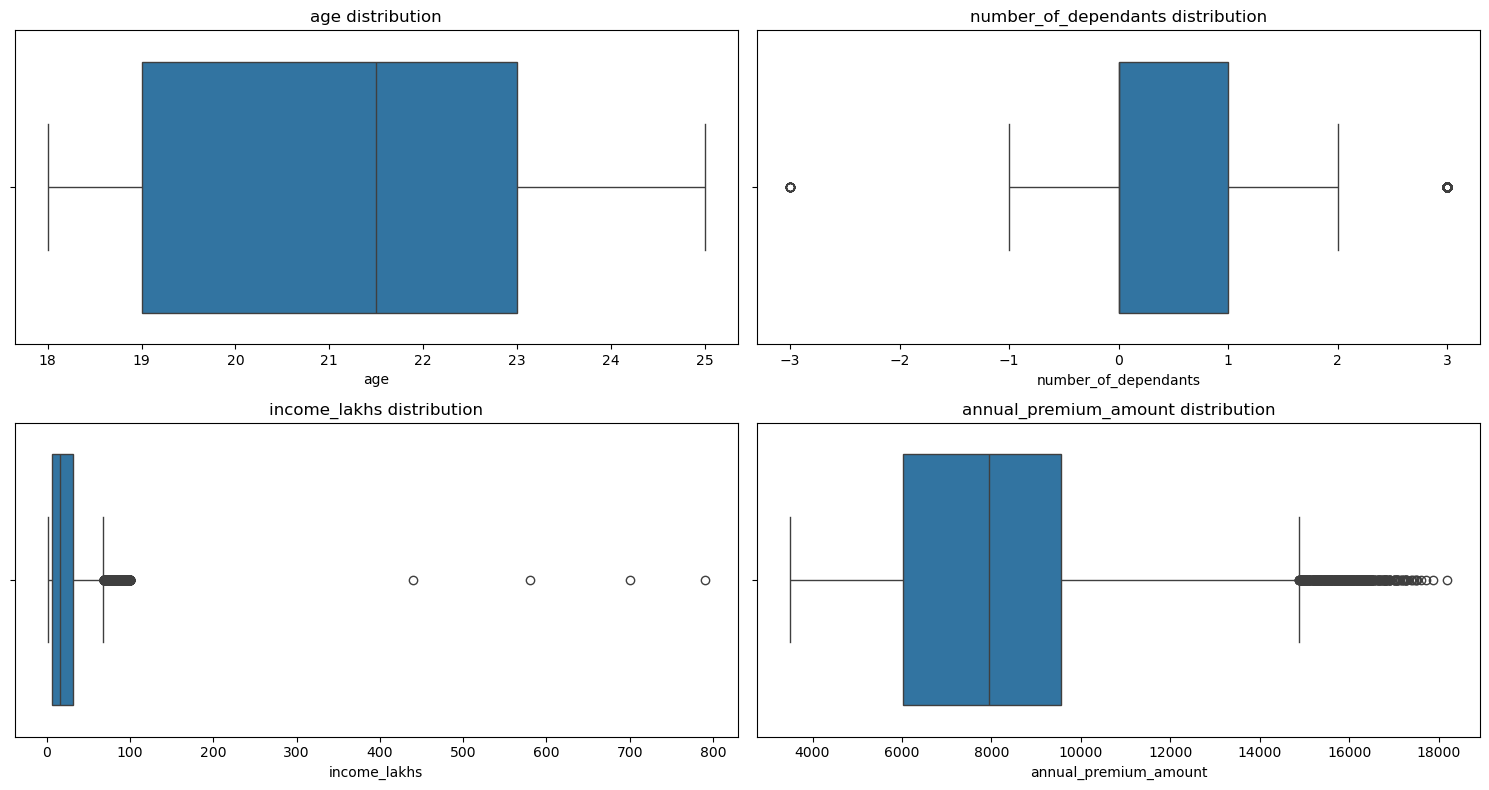

In [96]:
fig, axes= plt.subplots(2,2,figsize=(15,8))
axes= axes.flatten()
axes

for ax, col in zip(axes, numerical_columns):
    sns.boxplot(x= prem_data[col],ax = ax)
    ax.set_title(f'{col} distribution')
plt.tight_layout()
plt.show()

from the above figure age above 100 is not a valid so let us filter the records below 100

In [97]:
prem_data_filtered= prem_data[prem_data['age']<=100]

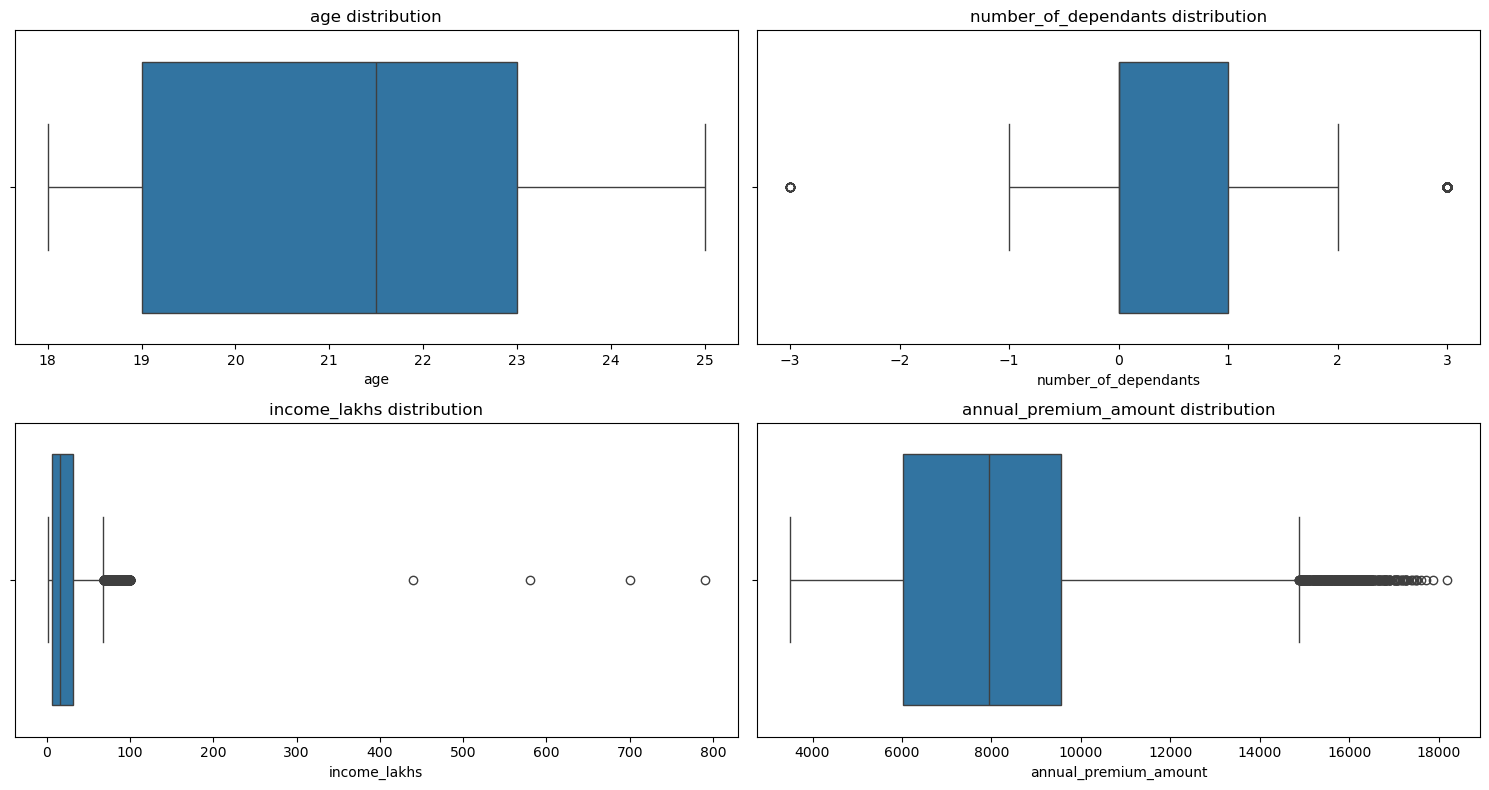

In [98]:
fig, axes= plt.subplots(2,2,figsize=(15,8))
axes= axes.flatten()
axes

for ax, col in zip(axes, numerical_columns):
    sns.boxplot(x= prem_data_filtered[col],ax = ax)
    ax.set_title(f'{col} distribution')
plt.tight_layout()
plt.show()

In [99]:
#Now let us find the IQR for income_lakhs
def quantile_calculation(col):
    Q1, Q3= col.quantile([0.25,0.75])
    IQR= Q3- Q1
    lower_bound = Q1- 1.5*IQR
    upper_bound= Q3+ 1.5*IQR
    return lower_bound,upper_bound
    

In [100]:
lf,hf=quantile_calculation(prem_data_filtered['income_lakhs'])
print(lf,hf)
prem_data_filtered[(prem_data_filtered['income_lakhs']<lf) | (prem_data_filtered['income_lakhs']> hf)].shape

-31.5 68.5


(1295, 14)

In [101]:
#as there are many records of outliers, after discusing with business team, decided to drop records at using quantile bound
threshold=prem_data_filtered['income_lakhs'].quantile(0.999) 
prem_data_filtered[prem_data_filtered['income_lakhs']>threshold].shape


(4, 14)

In [102]:
prem_data_filtered1=prem_data_filtered[prem_data_filtered['income_lakhs']<=threshold]

In [103]:
prem_data_filtered1.shape

(20092, 14)

## Univariate Analysis

/var/folders/0n/xvnlc6tj4b912wtm7gxtwn680000gn/T/ipykernel_15420/2485165952.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation= 90)


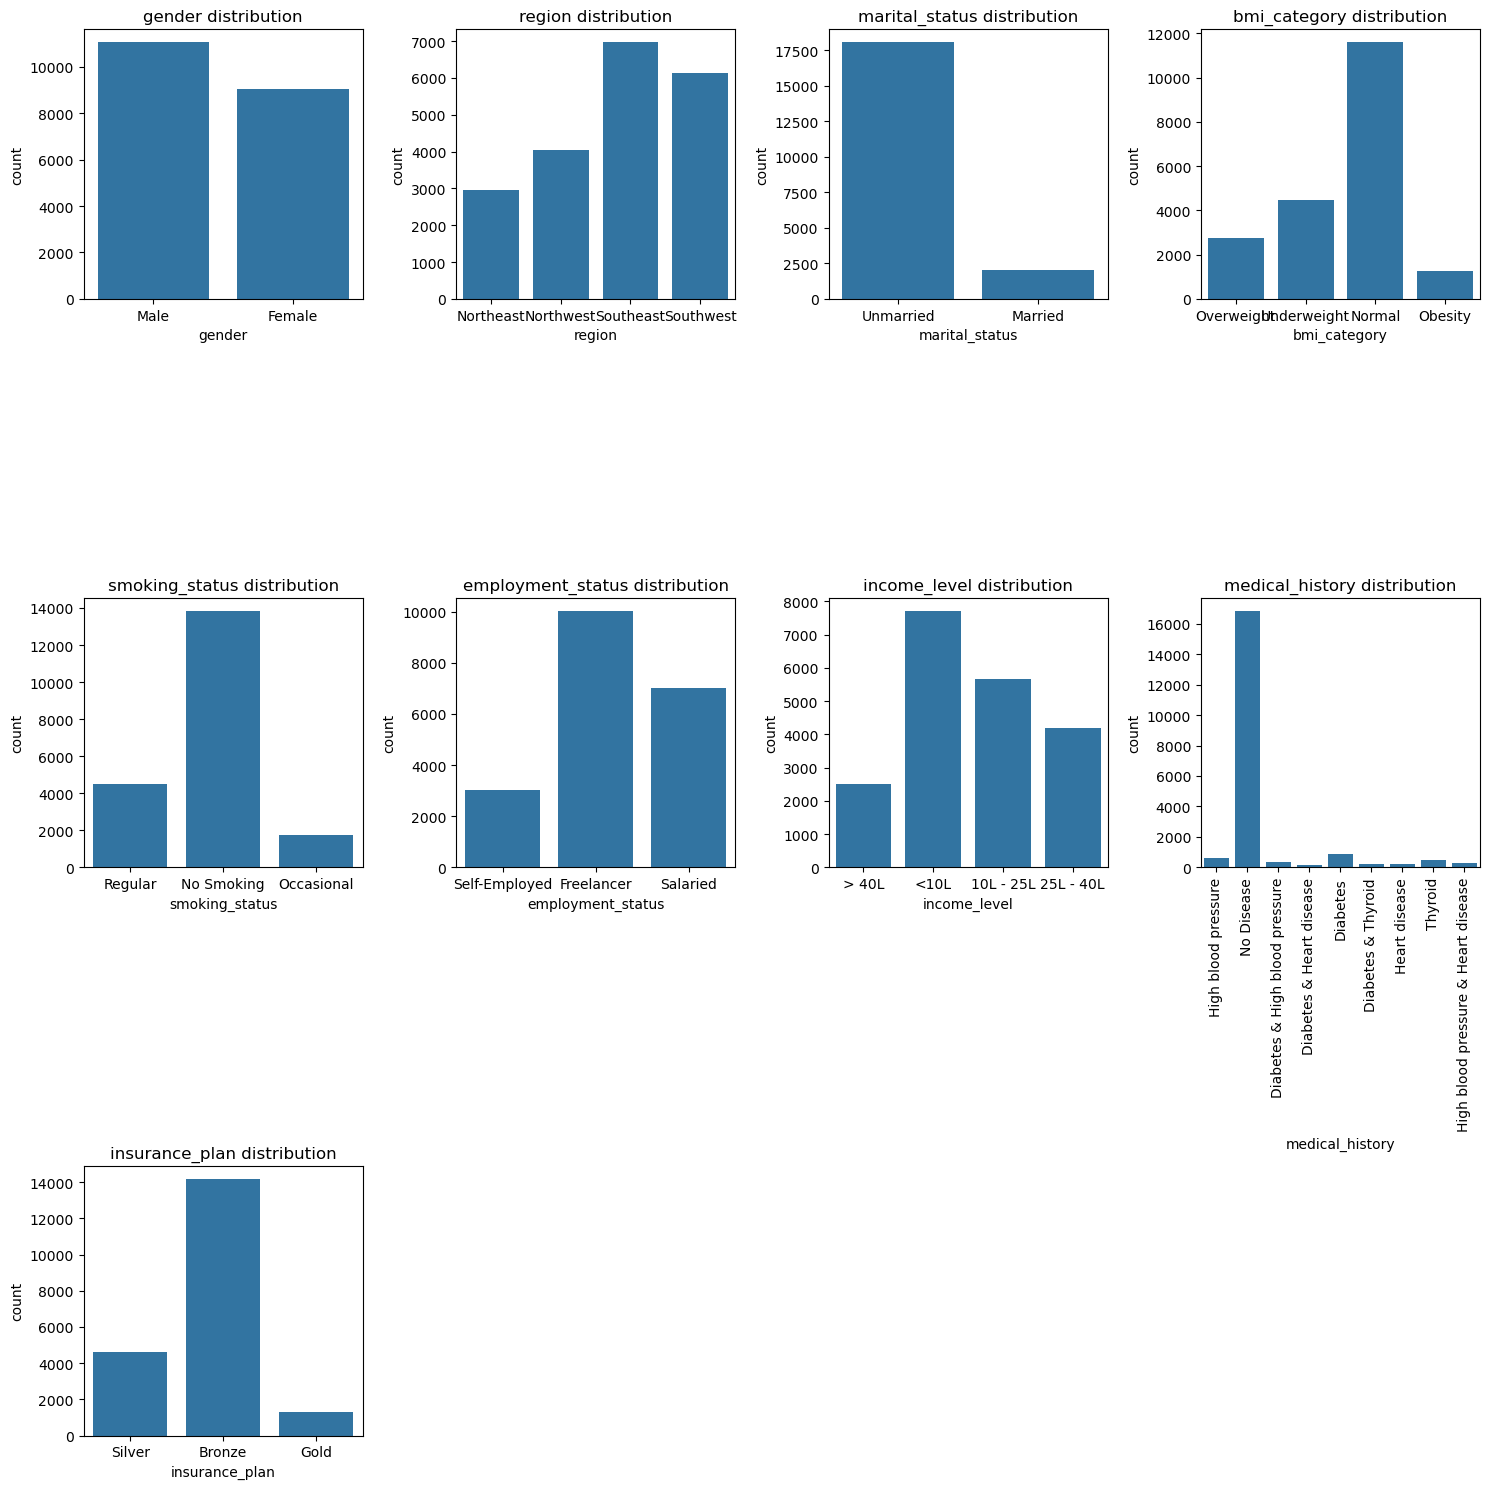

In [104]:
rows= 3
cols= (len(categorical_columns)//rows)+1
fig, axes= plt.subplots(rows,cols,figsize=(15,15))
axes= axes.flatten()
axes

for ax, col in zip(axes, categorical_columns):
    sns.countplot(x= prem_data_filtered1[col],ax = ax)
    ax.set_title(f'{col} distribution')
    if col== "medical_history":
        ax.set_xticklabels(ax.get_xticklabels(), rotation= 90)

for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i]) 
    
plt.tight_layout()
plt.show()

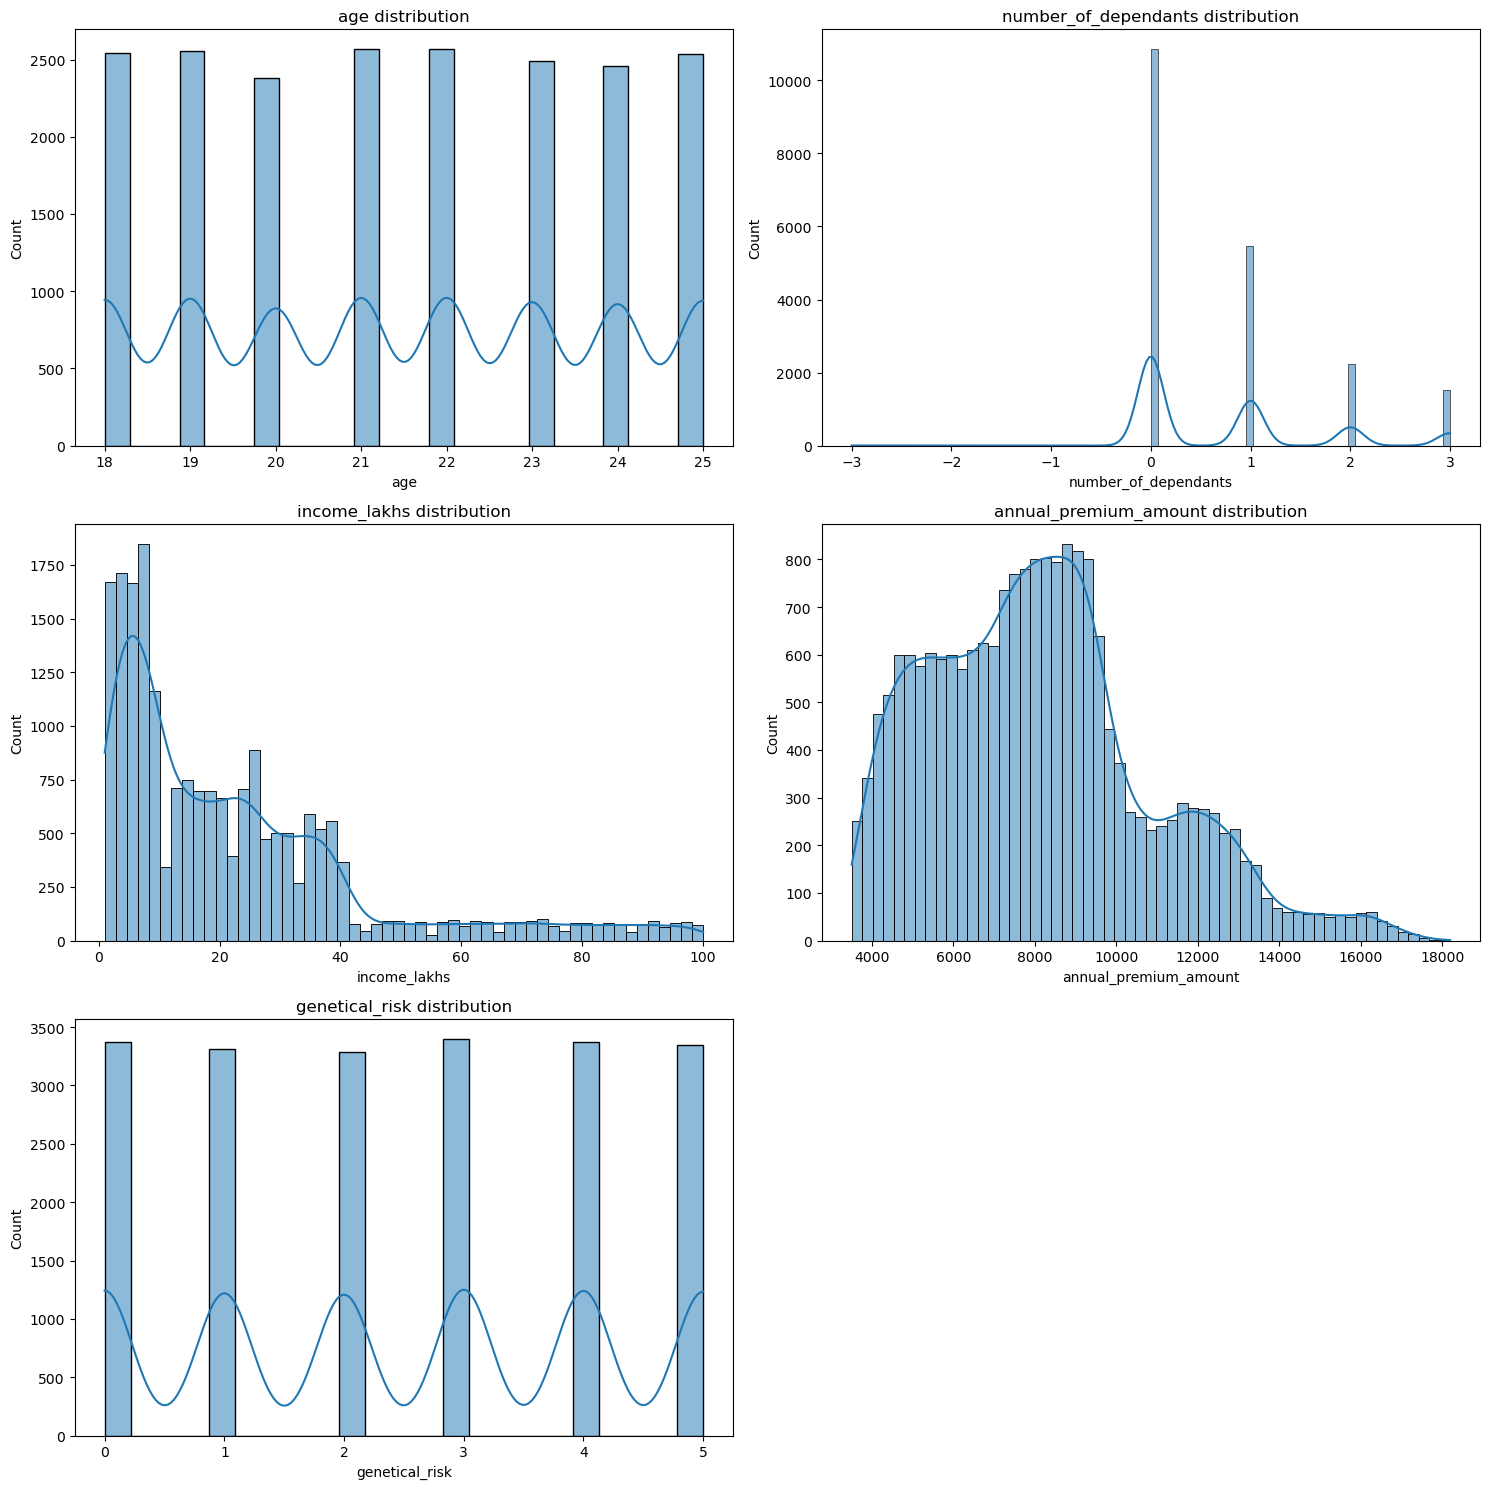

In [105]:
rows= 3
cols= (len(numerical_columns)//rows)+1
fig, axes= plt.subplots(rows,cols,figsize=(15,15))
axes= axes.flatten()
axes

for ax, col in zip(axes, numerical_columns):
    sns.histplot(x= prem_data_filtered1[col],ax = ax,kde=True)
    ax.set_title(f'{col} distribution')


for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i]) 
    
plt.tight_layout()
plt.show()

As number_of_dependants are less than 0, make them absolute values.

In [106]:
prem_data_filtered1['number_of_dependants']=prem_data_filtered1['number_of_dependants'].abs()

/var/folders/0n/xvnlc6tj4b912wtm7gxtwn680000gn/T/ipykernel_15420/2138320173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prem_data_filtered1['number_of_dependants']=prem_data_filtered1['number_of_dependants'].abs()


## Bi Variate Analysis

In [107]:
crosstab=pd.crosstab(prem_data_filtered1['marital_status'],prem_data_filtered1['smoking_status'])

<Axes: xlabel='marital_status'>

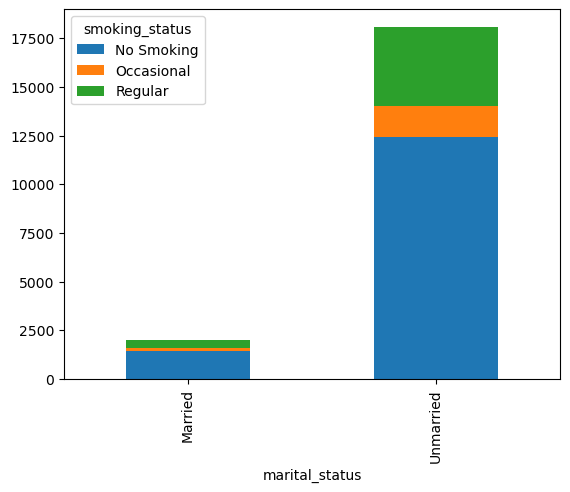

In [108]:
crosstab.plot(kind="bar",stacked=True)

<Axes: xlabel='smoking_status', ylabel='marital_status'>

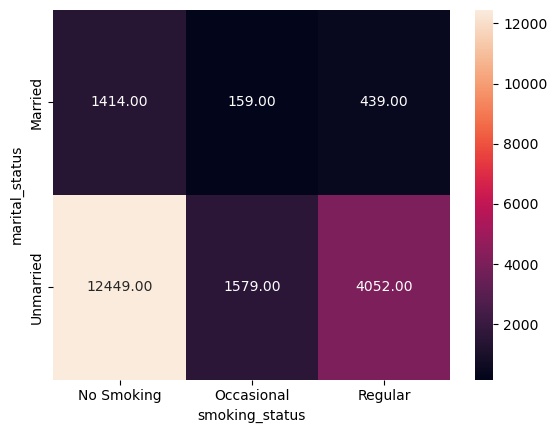

In [109]:
sns.heatmap(crosstab, annot=True,fmt=".2f")

In [110]:
numerical_columns

['age',
 'number_of_dependants',
 'income_lakhs',
 'annual_premium_amount',
 'genetical_risk']

<Axes: xlabel='number_of_dependants', ylabel='age'>

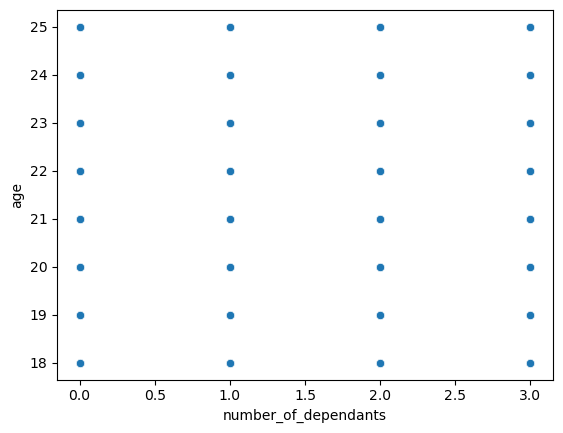

In [111]:
sns.scatterplot(y='age',x='number_of_dependants',data=prem_data_filtered1)

## Encode the categorical columns

In [112]:
categorical_columns

['gender',
 'region',
 'marital_status',
 'bmi_category',
 'smoking_status',
 'employment_status',
 'income_level',
 'medical_history',
 'insurance_plan']

In [113]:
prem_data_filtered1['medical_history'].unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [114]:
risk_score={
"diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0 
}


In [115]:
prem_data_filtered1[['dis1', 
                     'dis2']]= prem_data_filtered1['medical_history'].str.split('&',expand=True).apply(lambda x: x.str.lower())


/var/folders/0n/xvnlc6tj4b912wtm7gxtwn680000gn/T/ipykernel_15420/4268426606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prem_data_filtered1[['dis1',
/var/folders/0n/xvnlc6tj4b912wtm7gxtwn680000gn/T/ipykernel_15420/4268426606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prem_data_filtered1[['dis1',


In [116]:
prem_data_filtered1.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,dis1,dis2
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365.0,4,high blood pressure,None
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050.0,3,no disease,None
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857.0,4,no disease,None
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684.0,2,no disease,None
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712.0,1,no disease,None


In [117]:
prem_data_filtered1['dis1'].fillna('none', inplace=True)
prem_data_filtered1['dis2'].fillna('none', inplace=True)

/var/folders/0n/xvnlc6tj4b912wtm7gxtwn680000gn/T/ipykernel_15420/50144401.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prem_data_filtered1['dis1'].fillna('none', inplace=True)
/var/folders/0n/xvnlc6tj4b912wtm7gxtwn680000gn/T/ipykernel_15420/50144401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prem_data_filtered1['dis1'].fillna('

In [118]:
prem_data_filtered1['risk_score']= 0

def calculate_total_risk_score(row):
    disease1= row['dis1'].strip()
    disease2= row['dis2'].strip()
    score1= risk_score[disease1]
    score2= risk_score[disease2]
    return score1+ score2
    


/var/folders/0n/xvnlc6tj4b912wtm7gxtwn680000gn/T/ipykernel_15420/1736859144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prem_data_filtered1['risk_score']= 0


In [119]:
prem_data_filtered1['risk_score']=prem_data_filtered1[['dis1','dis2']].apply(calculate_total_risk_score, axis=1)

/var/folders/0n/xvnlc6tj4b912wtm7gxtwn680000gn/T/ipykernel_15420/3616989725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prem_data_filtered1['risk_score']=prem_data_filtered1[['dis1','dis2']].apply(calculate_total_risk_score, axis=1)


In [120]:
max_score= prem_data_filtered1['risk_score'].max()
min_score= prem_data_filtered1['risk_score'].min()
prem_data_filtered1['normalized_score']= (prem_data_filtered1['risk_score']- min_score)/(max_score-min_score)
prem_data_filtered1.head()

/var/folders/0n/xvnlc6tj4b912wtm7gxtwn680000gn/T/ipykernel_15420/20049080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prem_data_filtered1['normalized_score']= (prem_data_filtered1['risk_score']- min_score)/(max_score-min_score)


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,dis1,dis2,risk_score,normalized_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365.0,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050.0,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857.0,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684.0,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712.0,1,no disease,none,0,0.000000


In [121]:
prem_data_filtered1.drop(columns= ['dis1','dis2','risk_score','medical_history'],inplace=True)

/var/folders/0n/xvnlc6tj4b912wtm7gxtwn680000gn/T/ipykernel_15420/534884300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prem_data_filtered1.drop(columns= ['dis1','dis2','risk_score','medical_history'],inplace=True)


In [122]:
categorical_columns=list(prem_data_filtered1.select_dtypes(include='object').columns)
categorical_columns

['gender',
 'region',
 'marital_status',
 'bmi_category',
 'smoking_status',
 'employment_status',
 'income_level',
 'insurance_plan']

In [123]:
prem_data_filtered1['income_level'].value_counts()

income_level
<10L         7726
10L - 25L    5663
25L - 40L    4199
> 40L        2504
Name: count, dtype: int64

In [124]:
prem_data_filtered1['income_level']= prem_data_filtered1['income_level'].map({'<10L':1,'10L - 25L': 2, '25L - 40L':3, '> 40L':4})
prem_data_filtered1['insurance_plan']= prem_data_filtered1['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})

/var/folders/0n/xvnlc6tj4b912wtm7gxtwn680000gn/T/ipykernel_15420/2861020348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prem_data_filtered1['income_level']= prem_data_filtered1['income_level'].map({'<10L':1,'10L - 25L': 2, '25L - 40L':3, '> 40L':4})
/var/folders/0n/xvnlc6tj4b912wtm7gxtwn680000gn/T/ipykernel_15420/2861020348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prem_data_filtered1['insurance_plan']= prem_data_filtered1['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})


In [125]:
#for all the nominal_columns do one hot encoding
nominal_columns= ['gender',
 'region',
 'marital_status',
 'bmi_category',
 'smoking_status',
 'employment_status']
prem_data_filtered2= pd.get_dummies(prem_data_filtered1, columns=nominal_columns, drop_first= True,dtype=int)
prem_data_filtered2.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365.0,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050.0,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857.0,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,5684.0,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,5712.0,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


## Feature Scaling/Selection

In [126]:
prem_data_filtered2.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'genetical_risk',
       'normalized_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

<Axes: >

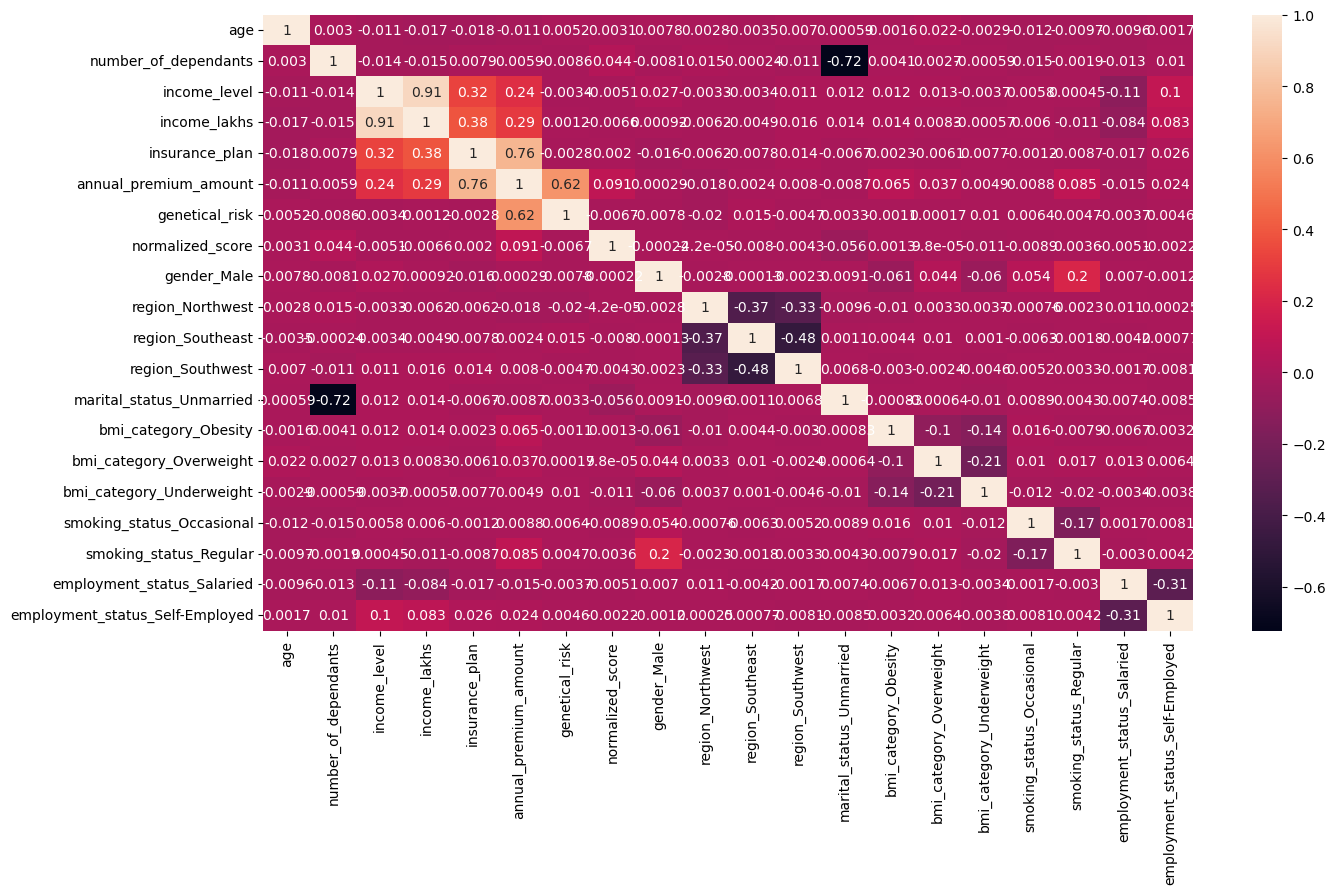

In [127]:
correlation_matrix= prem_data_filtered2.corr()
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot= True)

In [128]:
X= prem_data_filtered2.drop(columns='annual_premium_amount')
y= prem_data_filtered2['annual_premium_amount']

In [129]:
X.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'genetical_risk', 'normalized_score', 'gender_Male',
       'region_Northwest', 'region_Southeast', 'region_Southwest',
       'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

In [130]:
columns_to_scale=['age','number_of_dependants','income_level','income_lakhs','insurance_plan','genetical_risk']


In [131]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
scaler= MinMaxScaler()
X[columns_to_scale]= scaler.fit_transform(X[columns_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20092.000000,20092.000000,20092.000000,20092.000000,20092.000000,20092.000000,20092.000000,20092.000000,20092.000000,20092.000000,20092.000000,20092.000000,20092.000000,20092.000000,20092.000000,20092.000000,20092.000000,20092.000000,20092.000000
mean,0.499161,0.240908,0.357904,0.216021,0.179574,0.500766,0.092048,0.550368,0.201224,0.346954,0.304649,0.899861,0.063508,0.136522,0.222477,0.086502,0.223522,0.350040,0.149960
std,0.327749,0.312431,0.347475,0.219501,0.300034,0.342019,0.229987,0.497469,0.400925,0.476013,0.460270,0.300193,0.243880,0.343351,0.415920,0.281111,0.416615,0.476994,0.357041
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,0.800000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [133]:
#let us check for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df= pd.DataFrame()
    vif_df['Column']= data.columns
    vif_df['VIF']= [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [134]:
vif_df=calculate_vif(X)
vif_df.sort_values('VIF', ascending=False)

,Column,VIF
2,income_level,11.927349
3,income_lakhs,11.876297
11,marital_status_Unmarried,8.012823
0,age,3.154483
9,region_Southeast,2.990341
5,genetical_risk,2.981208
10,region_Southwest,2.744732
7,gender_Male,2.311752
8,region_Northwest,2.154017
1,number_of_dependants,1.930573


As income_level and income_lakhs both explain the same thing, the variance_inflation_factor is high, let us drop one

In [135]:
calculate_vif(X.drop(columns='income_level'))

,Column,VIF
0,age,3.153136
1,number_of_dependants,1.927942
2,income_lakhs,2.293705
3,insurance_plan,1.587760
4,genetical_risk,2.981208
5,normalized_score,1.154413
6,gender_Male,2.301579
7,region_Northwest,2.153088
8,region_Southeast,2.989160
9,region_Southwest,2.744059


Now everything looks good

In [136]:
X_reduced= X.drop(columns='income_level')
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.989899,0.5,0.8,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020202,0.5,0.6,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.969697,0.5,0.8,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.141414,0.0,0.4,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.131313,0.0,0.2,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


## Model Building

In [137]:
X_train, X_test, y_train, y_test= train_test_split(X_reduced, y, test_size=0.2, random_state=30)

In [138]:
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (16073, 18)
X_test shape (4019, 18)
y_train shape (16073,)
y_test shape (4019,)


## Linear Regression

In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
linear_model= LinearRegression()
linear_model.fit(X_train, y_train)

#check for scores (R2)
test_score= linear_model.score(X_test, y_test)
train_score= linear_model.score(X_train, y_train)
print(train_score,test_score)

0.9884872710783871 0.988200278996251


In [141]:
#check for mse and rmse

y_pred= linear_model.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
print("MSE for linear Regression", mse, "RMSE for linear regression", rmse)

MSE for linear Regression 87479.66043966918 RMSE for linear regression 295.76960702490913


## Random Forest Regressor

In [142]:
from sklearn.ensemble import RandomForestRegressor

In [143]:
rf_model= RandomForestRegressor(n_estimators=100, criterion= 'squared_error',max_depth =4,random_state=30)
rf_model.fit(X_train, y_train)

rf_test_score= rf_model.score(X_test, y_test)
rf_train_score= rf_model.score(X_train, y_train)
print(rf_test_score,rf_train_score)

0.9639029517219742 0.9643352474001473


In [144]:
#check for mse and rmse
rf_preds= rf_model.predict(X_test)
rf_mse= mean_squared_error(y_test,rf_preds)
rf_rmse= np.sqrt(rf_mse)
print("MSE for Random Forest Regressor", rf_mse, "RMSE for Random Forest Regressor", rf_rmse)

MSE for Random Forest Regressor 267612.8973924687 RMSE for Random Forest Regressor 517.313152154929


## XGBoost Regressor

In [145]:
from xgboost import XGBRegressor

In [146]:
xgb_model= XGBRegressor(n_estimators= 50, max_depth= 5)
xgb_model.fit(X_train, y_train)


xgb_test_score= xgb_model.score(X_test, y_test)
xgb_train_score= xgb_model.score(X_train, y_train)
print(xgb_test_score,xgb_train_score)

0.9883108860358643 0.9900308228561373


In [147]:
xgb_preds= xgb_model.predict(X_test)
xgb_mse= mean_squared_error(y_test, xgb_preds)
xgb_rmse= np.sqrt(xgb_mse)
print("MSE for XGBoost Regressor", xgb_mse, "RMSE for XGBoost Regressor", xgb_rmse)

MSE for XGBoost Regressor 86659.6523848576 RMSE for XGBoost Regressor 294.38011547123494


Out of three models XGBoost performed better, let us do hyper parameter tuning for the model

## Hyper Paramter tuning

In [148]:
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}


In [149]:
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,              # Try 50 different combinations
    scoring='neg_mean_squared_error',
    cv=5,                   # 5-fold cross-validation
    verbose=2,
    random_state=30,
    n_jobs=-1               # Use all available cores
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          multi_strategy=None, n_estimators=50,
                                          n_jobs=None, num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 500],
                                        'reg_alpha': [0, 0.1, 1],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=30, scoring='neg_mean_squared_error',
                   verbose=2)

In [150]:
best_params=random_search.best_params_
best_params

{'subsample': 0.6,
 'reg_lambda': 1.5,
 'reg_alpha': 0.1,
 'n_estimators': 500,
 'max_depth': 3,
 'learning_rate': 0.05,
 'colsample_bytree': 1.0}

In [151]:
#now train the model based on this params
xgb_model_opt= XGBRegressor(n_estimators= best_params['n_estimators'], max_depth= best_params['max_depth'],
                            reg_lambda= best_params['reg_lambda'],
                           reg_alpha=best_params['reg_alpha'],
                           learning_rate=best_params['learning_rate'],
                           colsample_bytree=best_params['colsample_bytree'])
xgb_model_opt.fit(X_train, y_train)


xgb_test_score_opt= xgb_model_opt.score(X_test, y_test)
xgb_train_score_opt= xgb_model_opt.score(X_train, y_train)
print(xgb_test_score_opt,xgb_train_score_opt)

0.9887320191403587 0.9893710126591243


In [152]:
xgb_preds_opt= xgb_model_opt.predict(X_test)
xgb_mse_opt= mean_squared_error(y_test, xgb_preds_opt)
xgb_rmse_opt= np.sqrt(xgb_mse_opt)
print("MSE for XGBoost Regressor", xgb_mse_opt, "RMSE for XGBoost Regressor", xgb_rmse_opt)

MSE for XGBoost Regressor 83537.49543136886 RMSE for XGBoost Regressor 289.0285373996292


In [153]:
residuals_df=pd.DataFrame({
  'actual': y_test,
'pred': xgb_preds_opt,
'residual': xgb_preds_opt-y_test,
'percentage': ((xgb_preds_opt-y_test)/(y_test))*100
})
residuals_df

,actual,pred,residual,percentage
11068,5660.0,5406.533203,-253.466797,-4.478212
17611,9303.0,9106.917969,-196.082031,-2.107729
12454,7816.0,7983.699219,167.699219,2.145589
7250,6304.0,6394.620117,90.620117,1.437502
1491,8671.0,8449.394531,-221.605469,-2.555708
...,...,...,...,...
11071,7682.0,7510.800781,-171.199219,-2.228576
8814,8860.0,8382.630859,-477.369141,-5.387914
18577,10102.0,10479.267578,377.267578,3.734583
13688,9473.0,8982.075195,-490.924805,-5.182358


In [154]:
threshold_res= 10
extreme_residuals=residuals_df[residuals_df['percentage']>threshold_res]
extreme_residuals.shape

(61, 4)

In [155]:
print(extreme_residuals.shape[0]/X_test.shape[0])


0.015177904951480468


The model looks good, so let us export the model

So this model is not working well for people with age less than 25. After informing the business team they gave dataset with addition of genetical_risk column. Let us build model on that dataset.

In [157]:
from joblib import dump

dump(xgb_model_opt, "premium_model_files/model_young.joblib")
scaler_with_cols = {
    'scaler': scaler,
    'columns_to_scale': columns_to_scale
}
dump(scaler_with_cols, "premium_model_files/scaler_young.joblib")

['premium_model_files/scaler_young.joblib']

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=500, reg_alpha=0, reg_lambda=2, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=500, reg_alpha=1, reg_lambda=2, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=4, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, reg_alpha=1, reg_lambda=2, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=8, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=8, n_estimators=500, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   0.